In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

import matplotlib.patches as mpatches

from skimage import data
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb


In [2]:
def isIntersection(b1,b2):
    return not(b2[0] > b1[2] or b2[2] < b1[0] or b2[1] > b1[3] or b2[3] < b1[1])

# read original image and resize the image

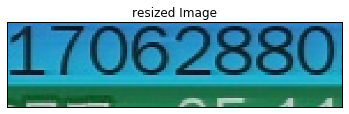

In [3]:
img_ori=cv2.imread("/home/fengsibo/my_project/OCR/image_segmentation/capture/catch1498659989782.jpg",1)

MAX_AREA=img_ori.shape[0]*img_ori.shape[1]

# decide the scale factor
scale=1.0
imgH=img_ori.shape[0]
imgH_ref=img_ori.shape[0]
while (imgH<160):
    scale+=0.1
    imgH=scale*imgH_ref

# resize image
dst=cv2.resize(img_ori,(0,0),fx= scale,fy= scale, interpolation=cv2.INTER_NEAREST)

plt.imshow(dst,cmap = 'gray')
plt.title('resized Image'), plt.xticks([]), plt.yticks([])
plt.show()

# convert color image to gray and reduce the noice

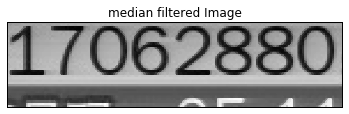

In [4]:
img_gray=cv2.cvtColor(dst, cv2.COLOR_BGR2GRAY)

img_median=cv2.medianBlur(img_gray,3)

plt.imshow(img_median,cmap = 'gray')
plt.title('median filtered Image'), plt.xticks([]), plt.yticks([])
plt.show()

# compute image edges

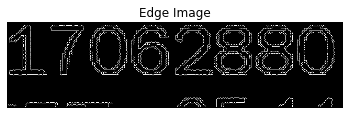

In [5]:
image_edges=cv2.Canny(img_median,100,200,3)#100,200,3

plt.imshow(image_edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

# Morphological Transformations

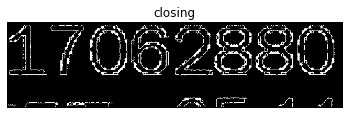

In [6]:
kernel=cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))

closing = cv2.morphologyEx(image_edges, cv2.MORPH_CLOSE, kernel)

plt.imshow(closing,cmap = 'gray')
plt.title('closing'), plt.xticks([]), plt.yticks([])
plt.show()

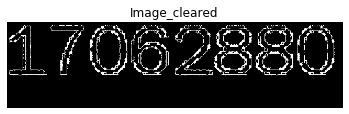

In [7]:
# clear the image border
cleared = clear_border(closing)

plt.imshow(cleared,cmap = 'gray')
plt.title('Image_cleared'), plt.xticks([]), plt.yticks([])
plt.show()

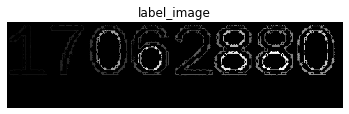

In [8]:
# label the image
label_image = label(cleared)

plt.imshow(label_image,cmap = 'gray')
plt.title('label_image'), plt.xticks([]), plt.yticks([])
plt.show()

# compute bounding box

In [9]:
all_regions=regionprops(label_image)

candidate_regions=[]
valid_regions=[]
isValid=0

for region in all_regions:
    # take regions with large enough areas
    if region.area >= MAX_AREA/18:
        candidate_regions.append(region.bbox)

for i in range(len(candidate_regions)):
    rr=candidate_regions[i]# reference box
    for j in range(len(candidate_regions)):
        if i==j:
            continue
        cr=candidate_regions[j]#the box to be compared with
        if cr[0]<rr[0] and cr[1]<rr[1] and cr[2]>rr[2] and cr[3]>rr[3]:
            isValid=0
            break
        else:
            isValid=1
    if isValid:
        valid_regions.append(rr)


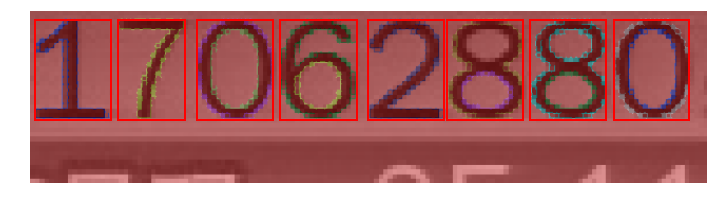

In [10]:
image_label_overlay = label2rgb(label_image, image=dst)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)
for region in valid_regions:
    # take regions with large enough areas
    minr, minc, maxr, maxc = region
    #print region.bbox
    rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                            fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(rect)
        #print type(region.bbox)
ax.set_axis_off()
plt.tight_layout()
plt.show()